In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

# Reading Files

In [205]:
def read_csv_files(filenames):
    dataframes=[]
    for filename in filenames:
        df = pd.read_csv(filename)
        dataframes.append(df)
    return dataframes

csv_files=['venues.csv', 'teams.csv', 'players.csv','overBallDetails.csv','overHistory.csv','matches.csv','innings.csv']
df_list=read_csv_files(csv_files)

C:\Users\Iqra\AppData\Local\Temp\ipykernel_30644\3579504291.py:4: DtypeWarning:

Columns (13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.



# venues

In [206]:
venues=df_list[0]
venues.head(5)

,id,fullName,shortName,city,country
0,1,M. A. Chidambaram Stadium,Chidambaram,Chennai,India
1,2,Eden Gardens,Eden Gardens,Kolkata,India
2,3,Sawai Mansingh Stadium,Sawai Mansingh Stadium,Jaipur,India
3,4,Wankhede Stadium,Wankhede Stadium,Mumbai,India
4,5,M. Chinnaswamy Stadium,M. Chinnaswamy Stadium,Bengaluru,India


In [207]:
venues.shape

(193, 5)

In [208]:
venues.dtypes

id            int64
fullName     object
shortName    object
city         object
country      object
dtype: object

## Handling Missing Values

In [209]:
venues.isnull().sum()

id            0
fullName      0
shortName    14
city          8
country      11
dtype: int64

In [210]:
#check null rows
venues[venues['country'].isnull()]

,id,fullName,shortName,city,country
173,1503,Harare Sports Club,NaN,NaN,NaN
174,100001,Pallekele International Cricket Stadium,NaN,NaN,NaN
180,100018,Titwood,NaN,Glasgow,NaN
181,100019,New Cambusdoon Ground,NaN,Ayr,NaN
182,100021,Multan Cricket Stadium,NaN,NaN,NaN
183,100027,Bulawayo Athletic Club,NaN,NaN,NaN
187,100148,De Beers Diamond Oval,NaN,NaN,NaN
188,100165,Shaheed Veer Narayan Singh International Crick...,NaN,NaN,NaN
189,100178,YS Raja Reddy Stadium,NaN,Kadapa,NaN
190,100187,United Cricket Club Ground,NaN,NaN,NaN


<Axes: >

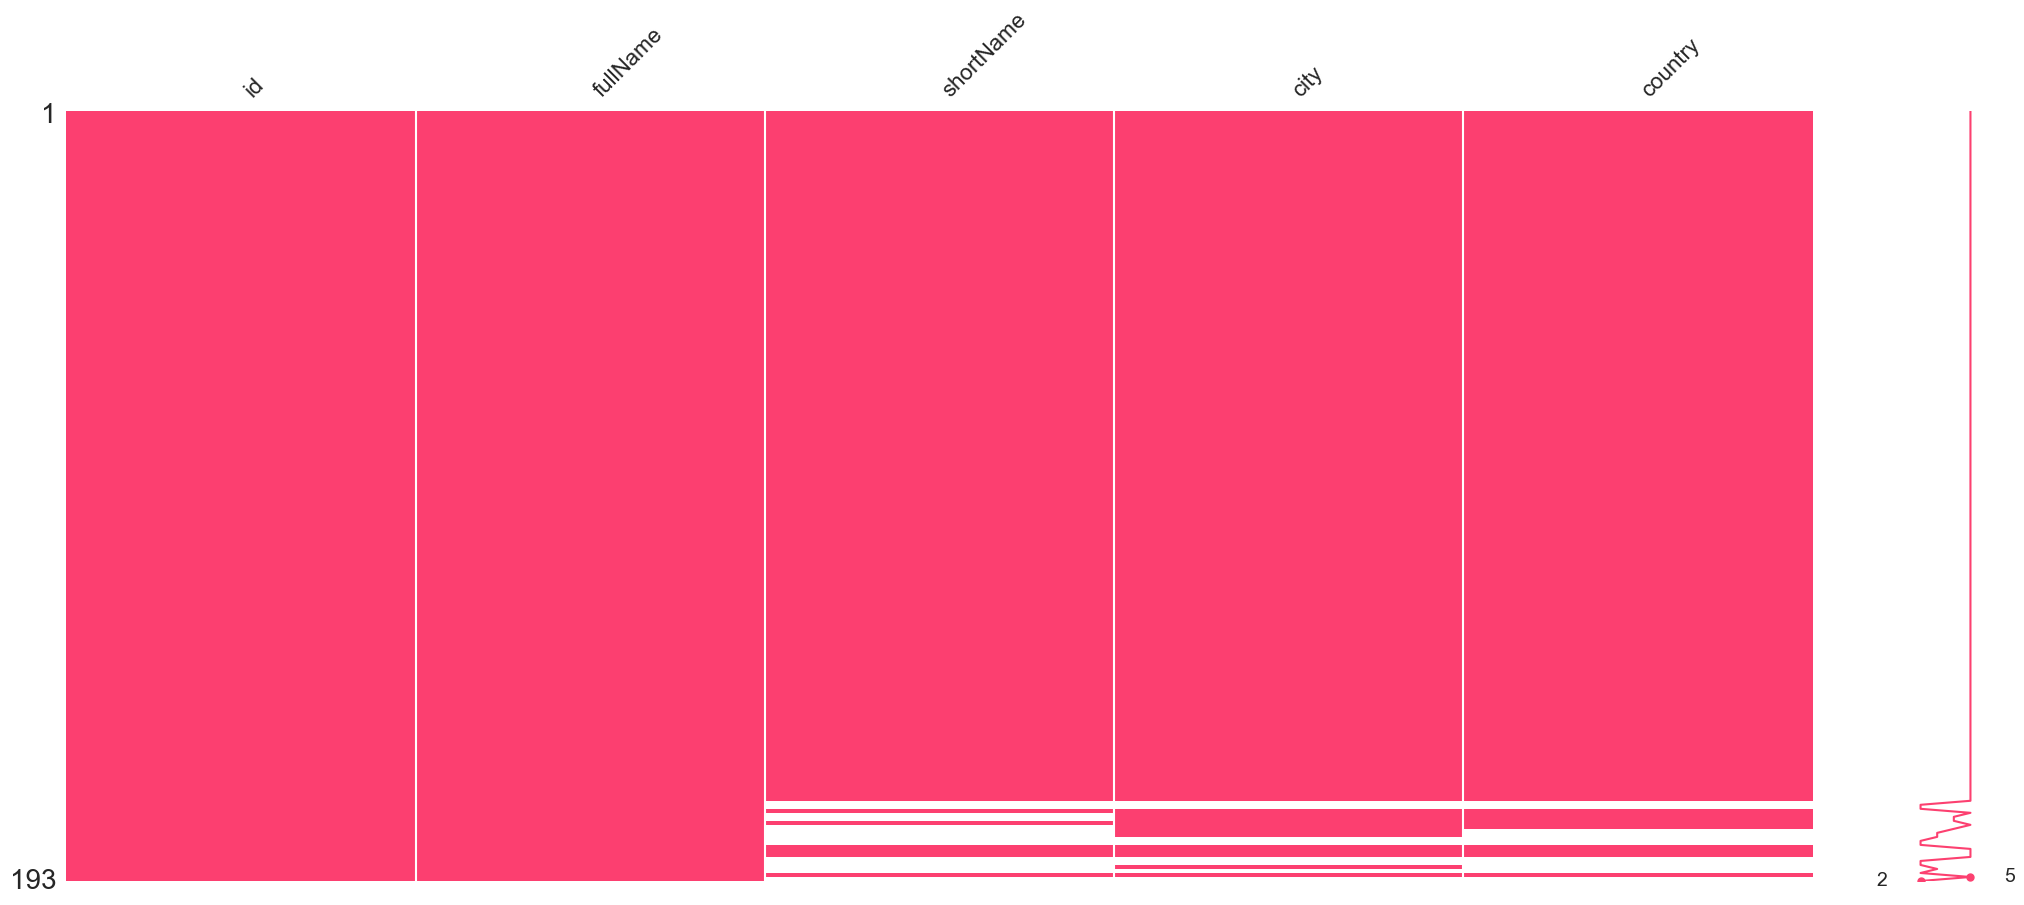

In [211]:
msno.matrix(venues,color=(0.99,0.25,0.44))

<b>Filling missing values</b>

In [212]:
venues.loc[:, 'country'] = venues['country'].fillna('Unknown')
venues.loc[:, 'city'] = venues['city'].fillna('Unknown')
venues.loc[:, 'shortName'] = venues['shortName'].fillna('Unknown')

<Axes: >

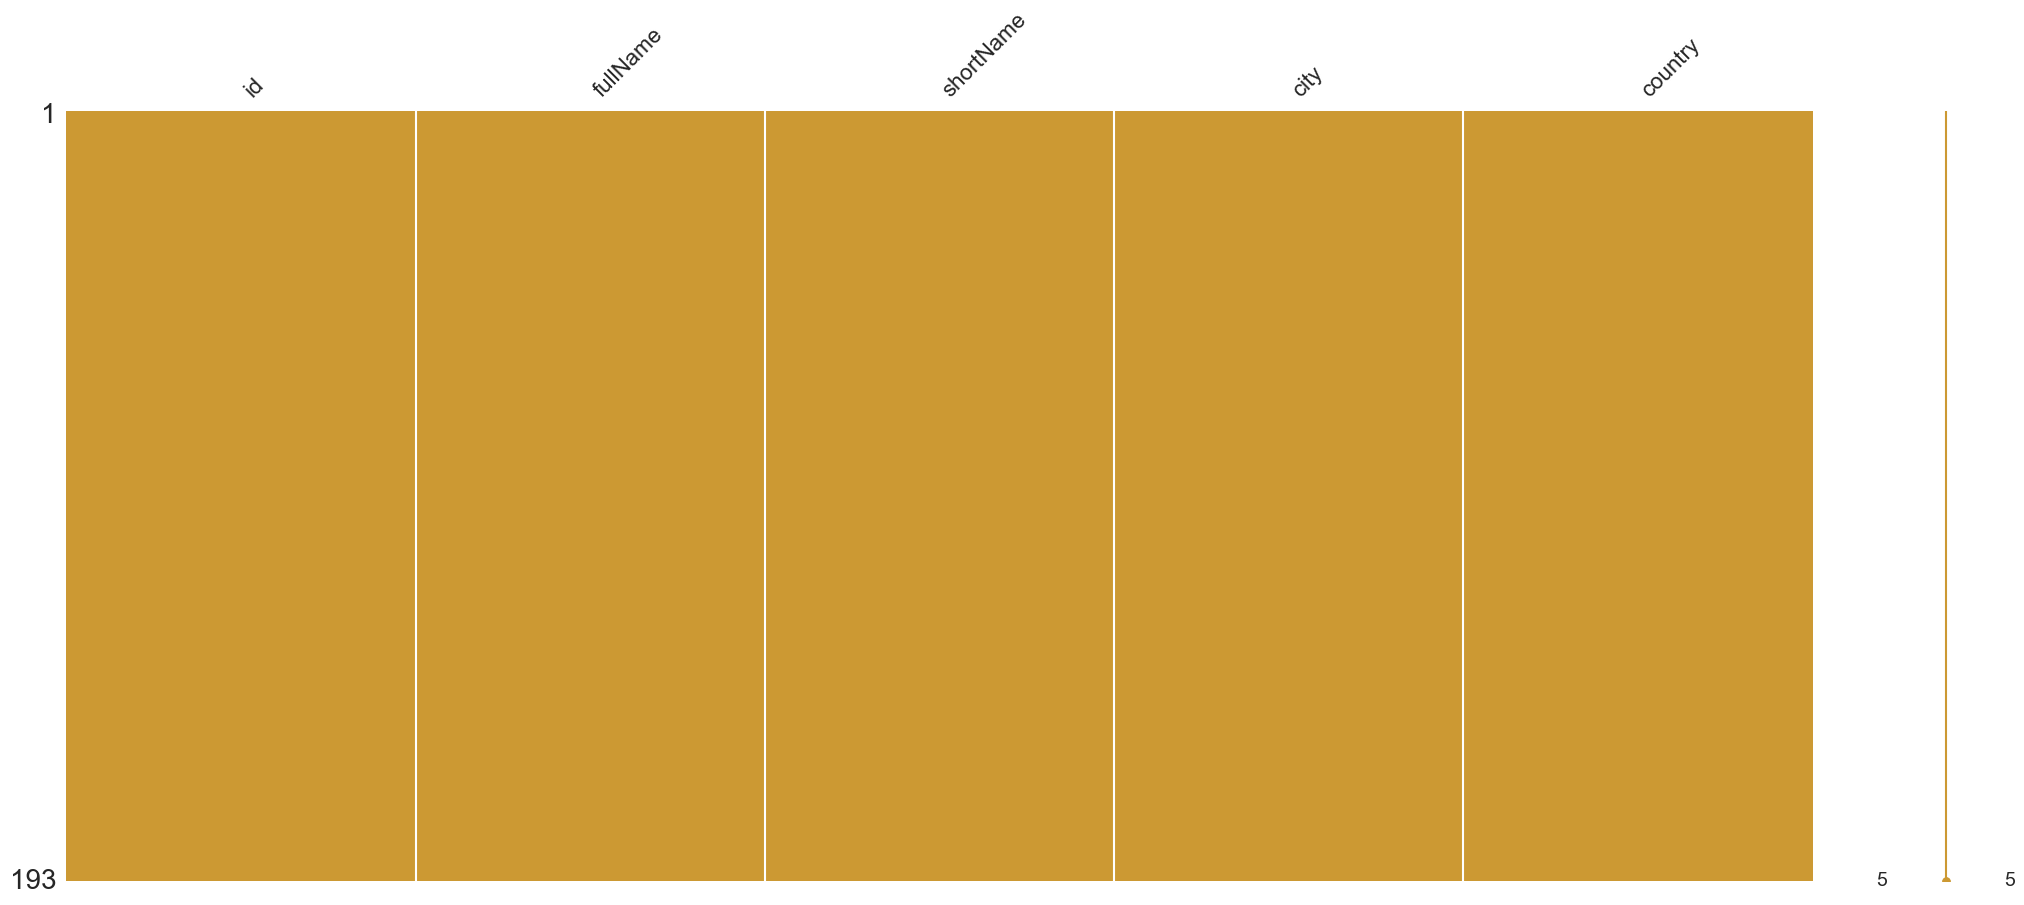

In [213]:
msno.matrix(venues,color=(0.80,0.60,0.20))

## Statistical Analysis

In [214]:
venues.describe(include="all")

,id,fullName,shortName,city,country
count,193.000000,193,193,193,193
unique,NaN,179,169,145,26
top,NaN,County Ground,Unknown,Unknown,India
freq,NaN,3,14,8,44
mean,10038.813472,NaN,NaN,NaN,NaN
std,29833.754501,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN
25%,66.000000,NaN,NaN,NaN,NaN
50%,216.000000,NaN,NaN,NaN,NaN
75%,375.000000,NaN,NaN,NaN,NaN


## Some hidden Patterns

### Venues by Country

In [215]:
# Count the number of venues in each country
country_counts = venues['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Number of Venues']

# Create a scatter plot with bubble markers using Plotly Express
fig = px.scatter(country_counts, 
                 x='Country', 
                 y='Number of Venues',
                 size='Number of Venues',
                 color='Number of Venues',
                 hover_name='Country',
                 title='Distribution of Venues by Country',
                 size_max=50,  # Adjust the maximum size of bubbles
                 template='ggplot2')  # Use the 'ggplot2' template for a different style

# Show the figure
fig.show()


### Venues by City

In [216]:
# Count the number of venues in each city
city_counts = venues['city'].value_counts().reset_index()
city_counts.columns = ['City', 'Number of Venues']

# Sort cities by the number of venues
city_counts = city_counts.sort_values(by='Number of Venues', ascending=True)

# Create a scatter plot using Plotly Express
fig = px.scatter(city_counts, 
                 x='Number of Venues', 
                 y='City',
                 size='Number of Venues',
                 color='Number of Venues',
                 hover_name='City',
                 title='Distribution of Venues by City',
                 labels={'Number of Venues': 'Number of Venues'},
                 template='plotly',
                 size_max=30)  # Adjust the maximum size of markers

# Show the figure
fig.show()


## lets Join Matches and Venues

In [217]:
matches_venues = pd.merge(matches,venues, left_on='venueId', right_on='id', how='inner')

### No of total tournaments hosted by country

In [218]:
#plotly bar chart
fig = px.bar(tournaments_sorted,x='country',y='tournamentLabel',text='tournamentLabel',color='tournamentLabel',
             color_continuous_scale='Viridis',
)

#layout
fig.update_layout(
    #title="Number of Tournaments Hosted by Each Country",
    xaxis_title="Country",yaxis_title="Number of Tournaments Hosted",
    xaxis=dict(tickangle=-45, tickfont=dict(size=10)),
    yaxis=dict(showticklabels=False, showgrid=False),
    autosize=True,
    showlegend=False,
    coloraxis_showscale=False,  # Hide the color scale
)

# hover text
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Show the plot
fig.show()


### Team performance per venues

In [219]:
import plotly.express as px

# Assuming 'filtered_data' is already defined as per the previous steps
fig = px.bar(filtered_data, x='win_count', y='venue_name', color='winner', 
             title='Team Performances at Different Venues', 
             labels={'win_count': 'Win Count', 'venue_name': 'Venue Name', 'winner': 'Team'},
             orientation='h', barmode='stack')

fig.update_layout(yaxis={'categoryorder':'total ascending'}, xaxis_title='Win Count', yaxis_title='Venue Name')
fig.show()


# teams

In [220]:
teams = df_list[1]
teams.head(5)

,id,fullName,shortName,abbreviation,wicketKeeperId,captainId
0,11,England,England,ENG,2050.0,1988.0
1,11,England,England,ENG,1996.0,2004.0
2,11,England,England,ENG,2229.0,2096.0
3,11,England,England,ENG,2222.0,2226.0
4,11,England,England,ENG,2330.0,2169.0


In [221]:
teams.tail()

,id,fullName,shortName,abbreviation,wicketKeeperId,captainId
349,572,United States of America,United States of America,USA,430105.0,398513.0
350,572,United States of America,USA,USA,17111.0,17109.0
351,572,United States of America,USA,USA,19127.0,17109.0
352,572,United States of America,United States of America,USA,1159641.0,398513.0
353,572,United States of America,USA,USA,NaN,NaN


In [222]:
teams.dtypes

id                  int64
fullName           object
shortName          object
abbreviation       object
wicketKeeperId    float64
captainId         float64
dtype: object

In [223]:
teams.shape

(354, 6)

In [224]:
teams['fullName'].nunique()

26

In [225]:
teams['fullName'].value_counts()

Sri Lanka                   40
Australia                   29
Zimbabwe                    27
Pakistan                    25
New Zealand                 25
West Indies                 25
India                       24
South Africa                22
England                     20
Afghanistan                 15
Bangladesh                  15
Scotland                    11
United Arab Emirates        10
Ireland                     10
Netherlands                  8
Nepal                        8
Kenya                        7
Papua New Guinea             6
Namibia                      5
Canada                       5
United States of America     5
Oman                         4
Hong Kong                    4
East Africa                  2
Jersey                       1
Bermuda                      1
Name: fullName, dtype: int64

## Missing Values

<Axes: >

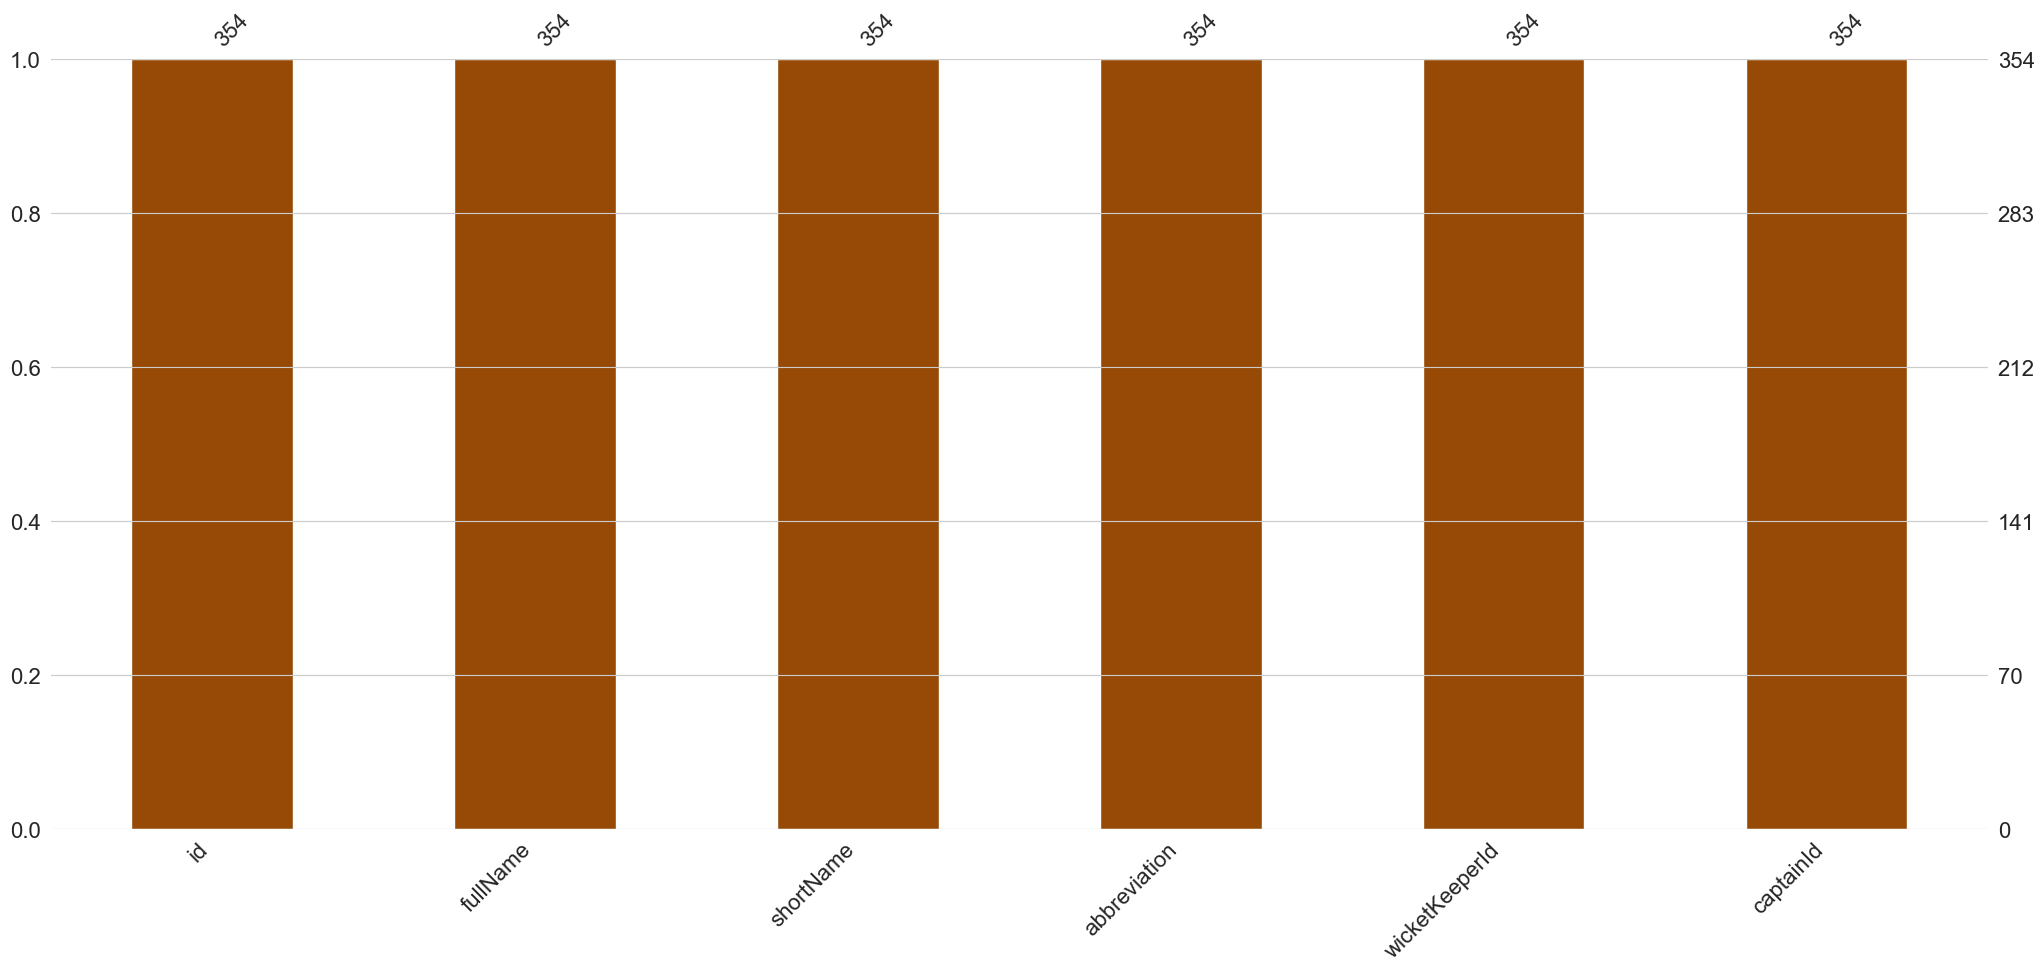

In [254]:
msno.bar(teams,color=(0.59, 0.29, 0.023))

In [228]:
teams.isnull().sum()

id                0
fullName          0
shortName         0
abbreviation      0
wicketKeeperId    7
captainId         6
dtype: int64

In [229]:
teams[teams['wicketKeeperId'].isnull()]

,id,fullName,shortName,abbreviation,wicketKeeperId,captainId
29,12,Ireland,Ireland,IRE,NaN,NaN
32,13,Sri Lanka,Sri Lanka,SL,NaN,NaN
42,13,Sri Lanka,Sri Lanka,SL,NaN,175.0
122,15,Australia,Australia,AUS,NaN,NaN
147,16,New Zealand,New Zealand,NZ,NaN,NaN
346,155,United Arab Emirates,UAE,UAE,NaN,NaN
353,572,United States of America,USA,USA,NaN,NaN


In [230]:
#there are wicketKeeperId(7) and captainId(6) missing values, lets imoute it with placeholder
teams['wicketKeeperId']=teams['wicketKeeperId'].fillna(-1)
teams['captainId']=teams['captainId'].fillna(-1)

<Axes: >

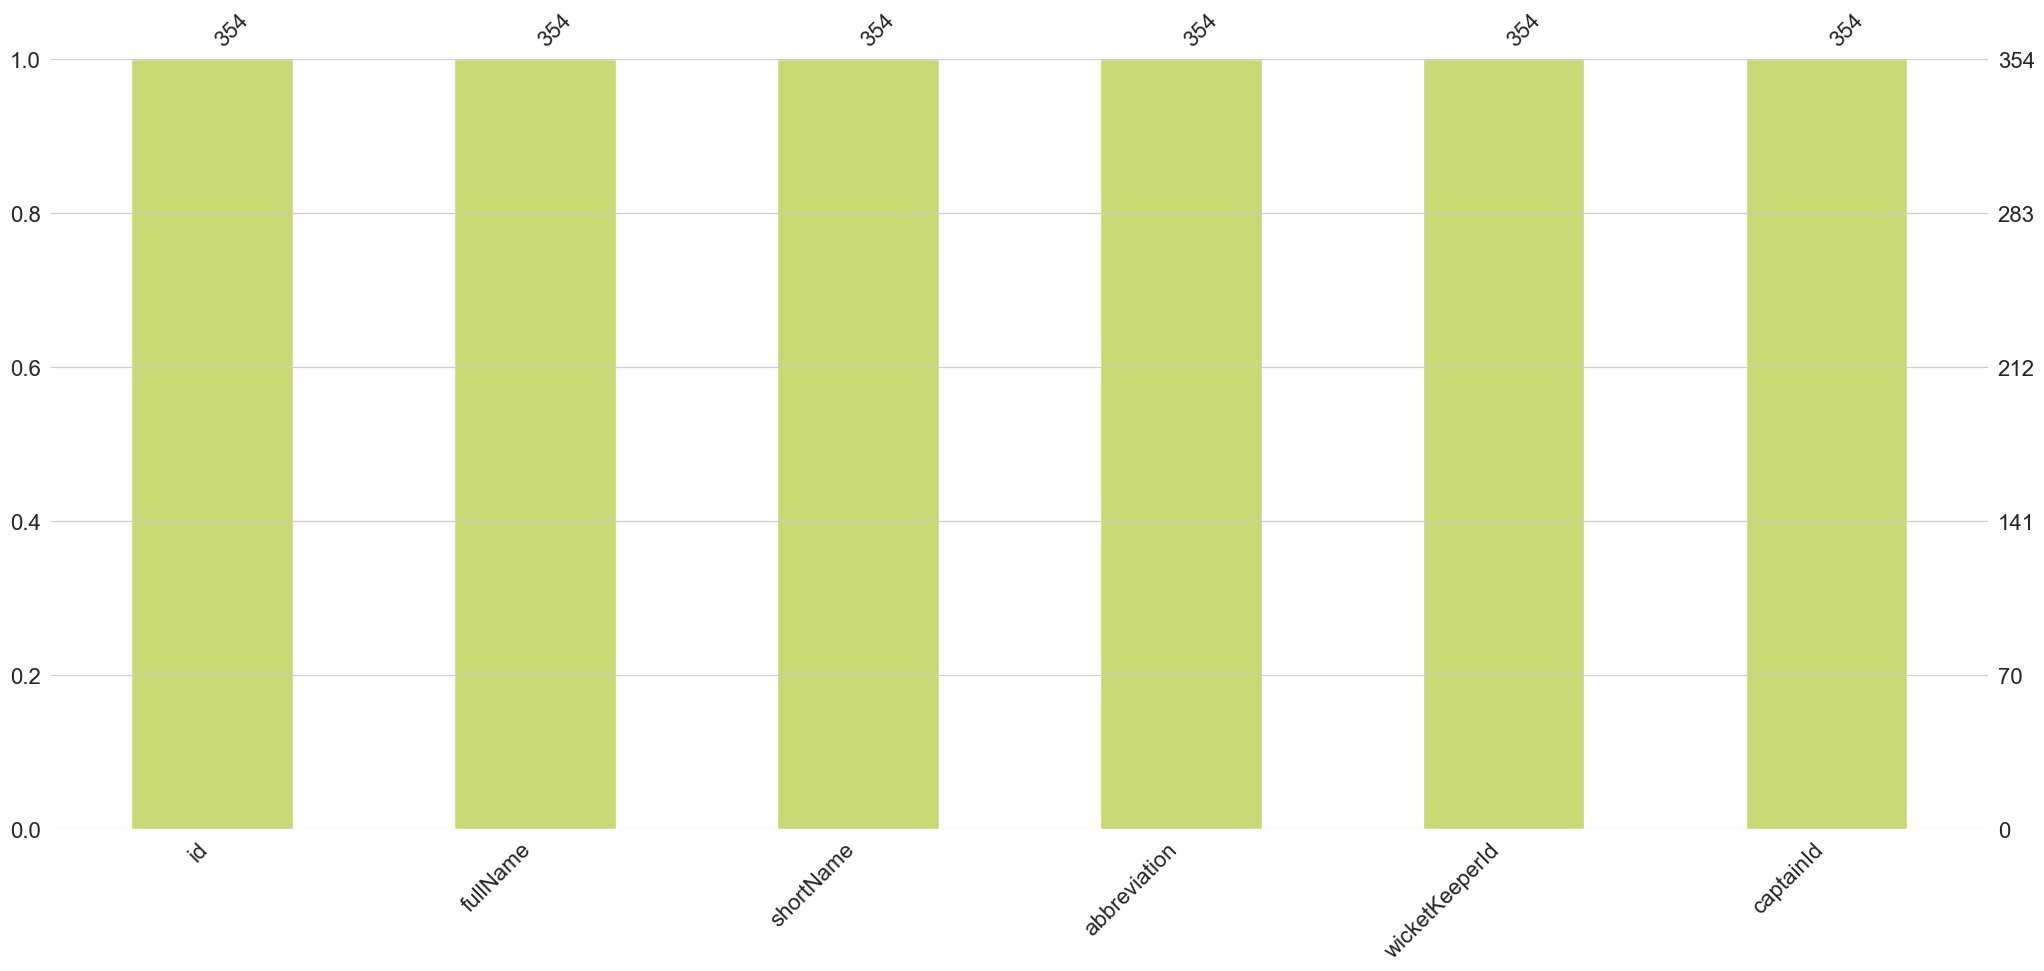

In [238]:
msno.bar(teams,color=(0.79, 0.85, 0.45))

### Number of matches played by each team

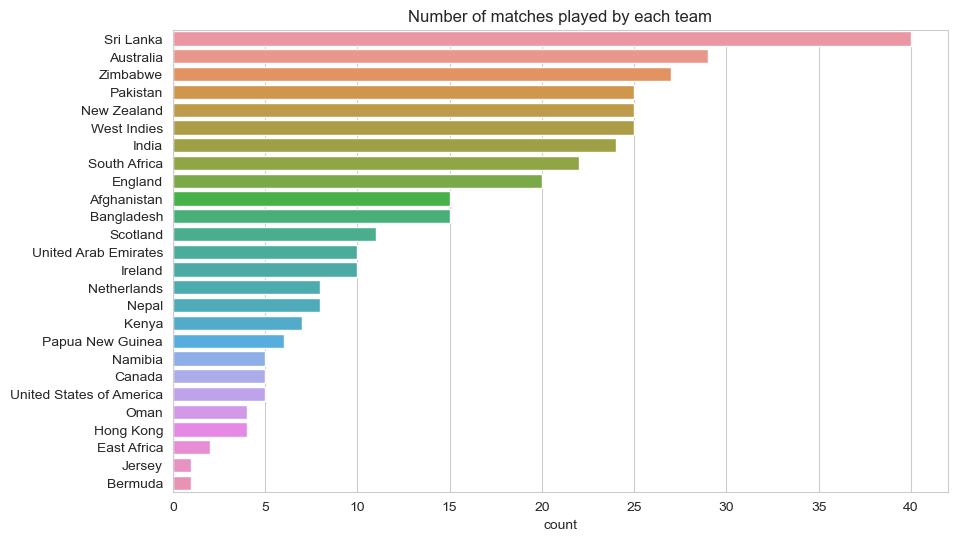

In [246]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating the bar graph
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=teams, y='fullName', order=teams['fullName'].value_counts().index)

# Remove the y-axis label
ax.set_ylabel('')

plt.title('Number of matches played by each team')
plt.show()


# players

In [255]:
players=df_list[2]
players.head()

,id,fullName,shortName,nationality,dateOfBirth,rightArmedBowl,rightHandedBat,bowlingStyle,teamId
0,2065,Rick McCosker,RB McCosker,Australian,1946-12-11,False,True,NaN,2808
1,2114,Alan Turner,A Turner,Australian,1950-07-23,False,True,NaN,2808
2,2083,Greg Chappell,G Chappell,Australian,1948-08-07,True,True,MEDIUM_SEAM,2808
3,2115,Jeff Thomson,J Thomson,Australian,1950-08-16,True,True,FAST_SEAM,2808
4,2020,Ian Chappell,I Chappell,Australian,1943-09-26,True,True,LEG_SPIN,2808


In [256]:
players.shape

(28911, 9)

In [257]:
players.dtypes

id                 int64
fullName          object
shortName         object
nationality       object
dateOfBirth       object
rightArmedBowl      bool
rightHandedBat      bool
bowlingStyle      object
teamId             int64
dtype: object

### Handling Missing Values

In [258]:
players.isnull().sum()

id                    0
fullName              0
shortName             0
nationality         662
dateOfBirth         562
rightArmedBowl        0
rightHandedBat        0
bowlingStyle      10583
teamId                0
dtype: int64

<Axes: >

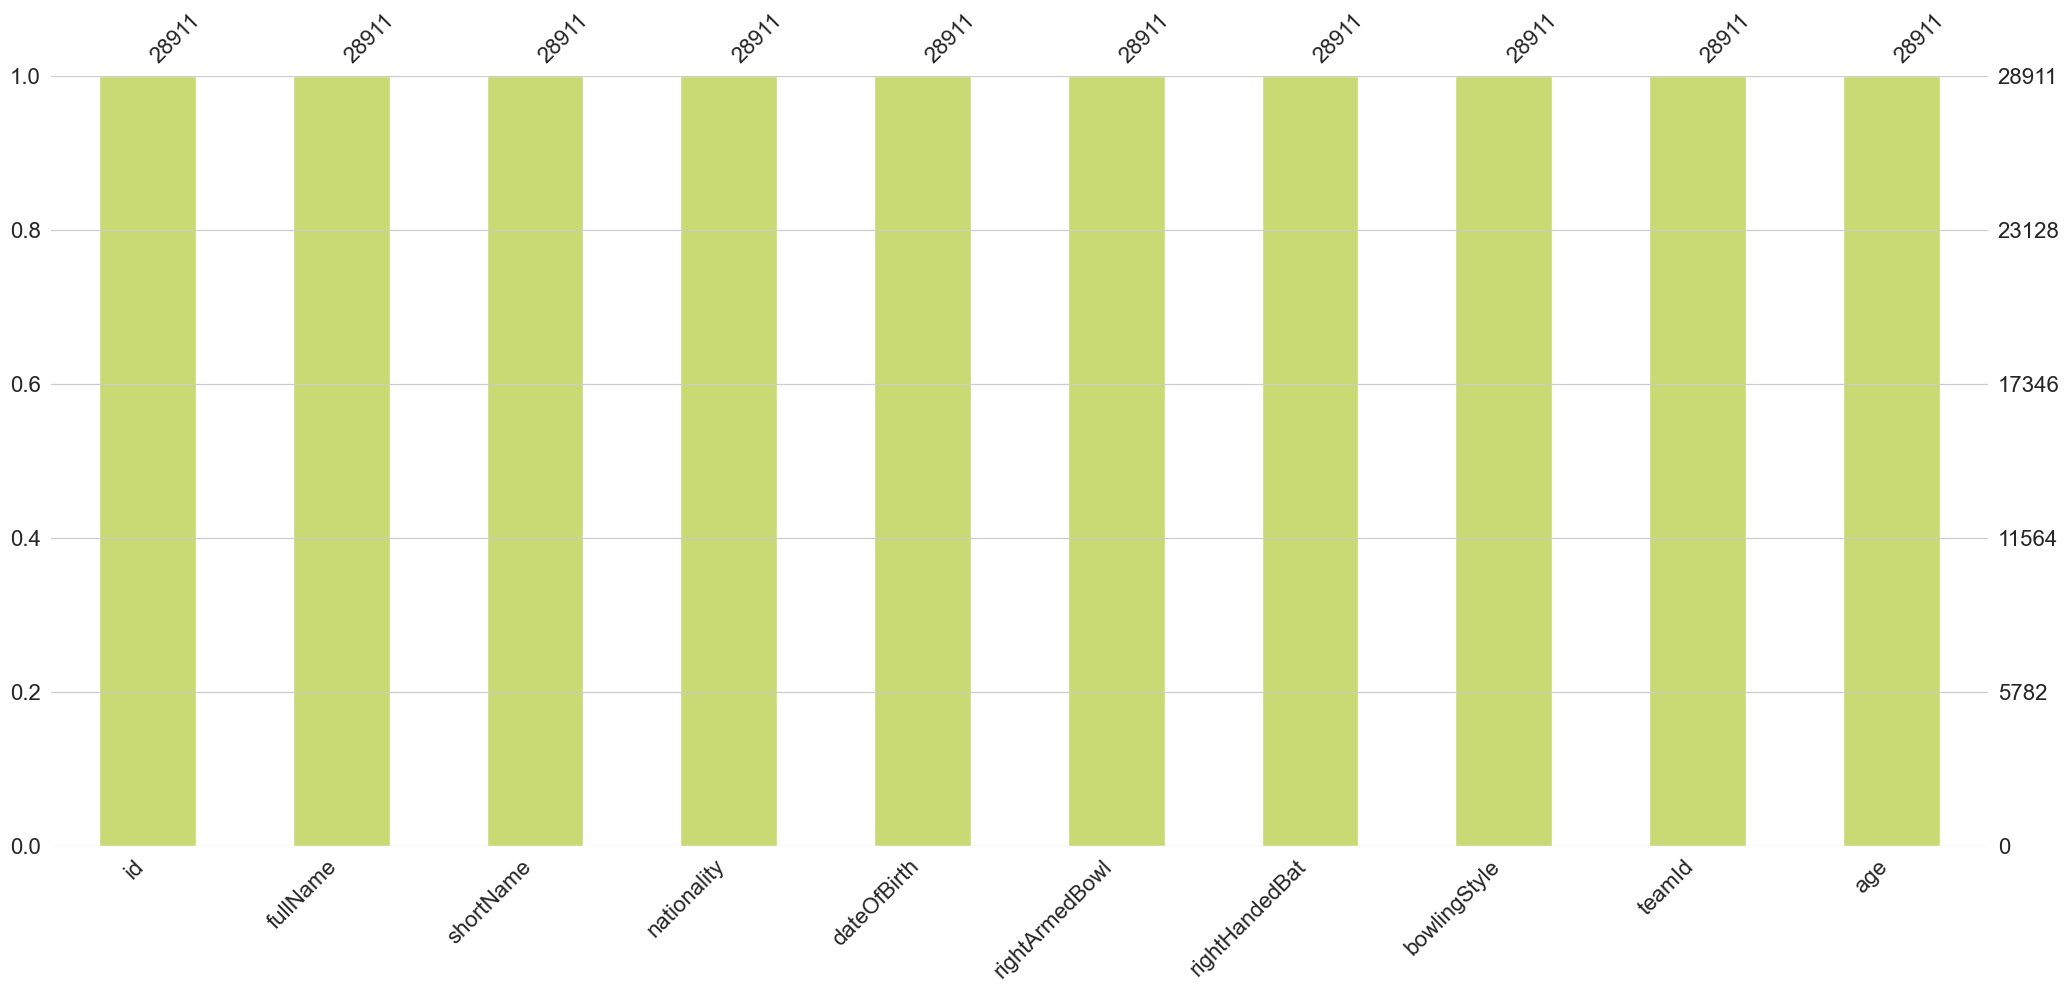

In [263]:
msno.bar(players,color=(0.79, 0.85, 0.45))

In [259]:
# Fill missing values in 'nationality' and 'dateOfBirth' columns
players['nationality'].fillna('Unknown', inplace=True)
players['dateOfBirth'].fillna(players['dateOfBirth'].mode()[0], inplace=True)

# Fill missing values in 'bowlingStyle' column
players['bowlingStyle'].fillna('Unknown', inplace=True)

# Check for any remaining missing values
print(players.isnull().sum())


id                0
fullName          0
shortName         0
nationality       0
dateOfBirth       0
rightArmedBowl    0
rightHandedBat    0
bowlingStyle      0
teamId            0
dtype: int64


<Axes: >

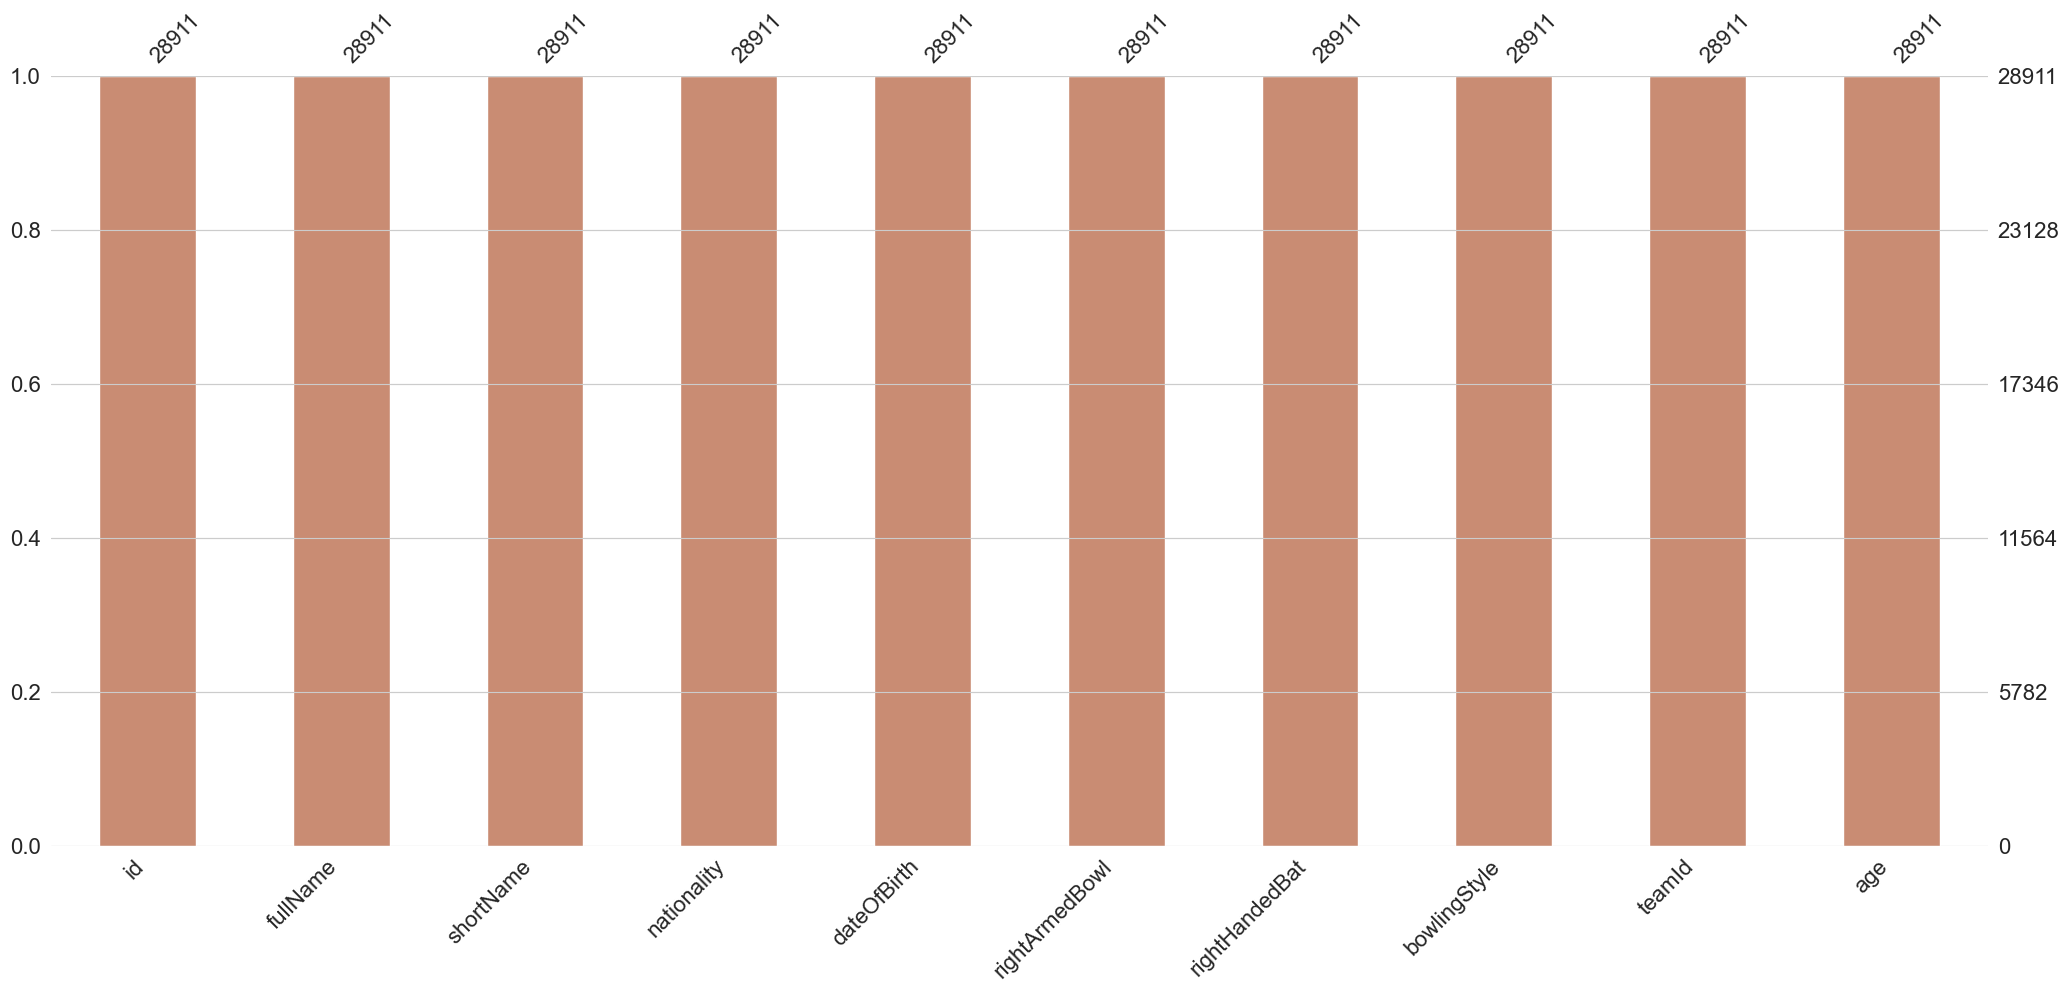

In [265]:
msno.bar(players,color=(0.79, 0.55, 0.45))

### Age Distribution

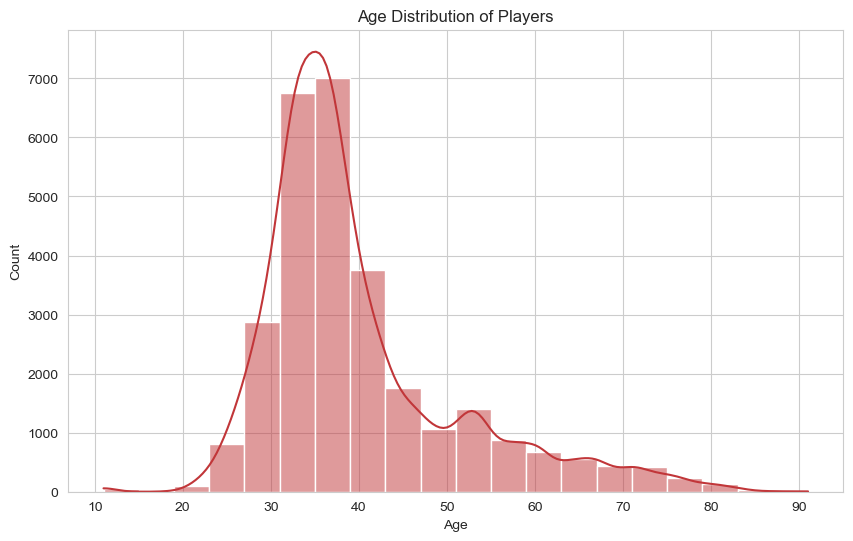

In [266]:
players['dateOfBirth'] = pd.to_datetime(players['dateOfBirth'])
players['age'] = (pd.to_datetime('today') - players['dateOfBirth']).astype('<m8[Y]')

plt.figure(figsize=(10, 6))
sns.histplot(players['age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


#### Nationality Distribution

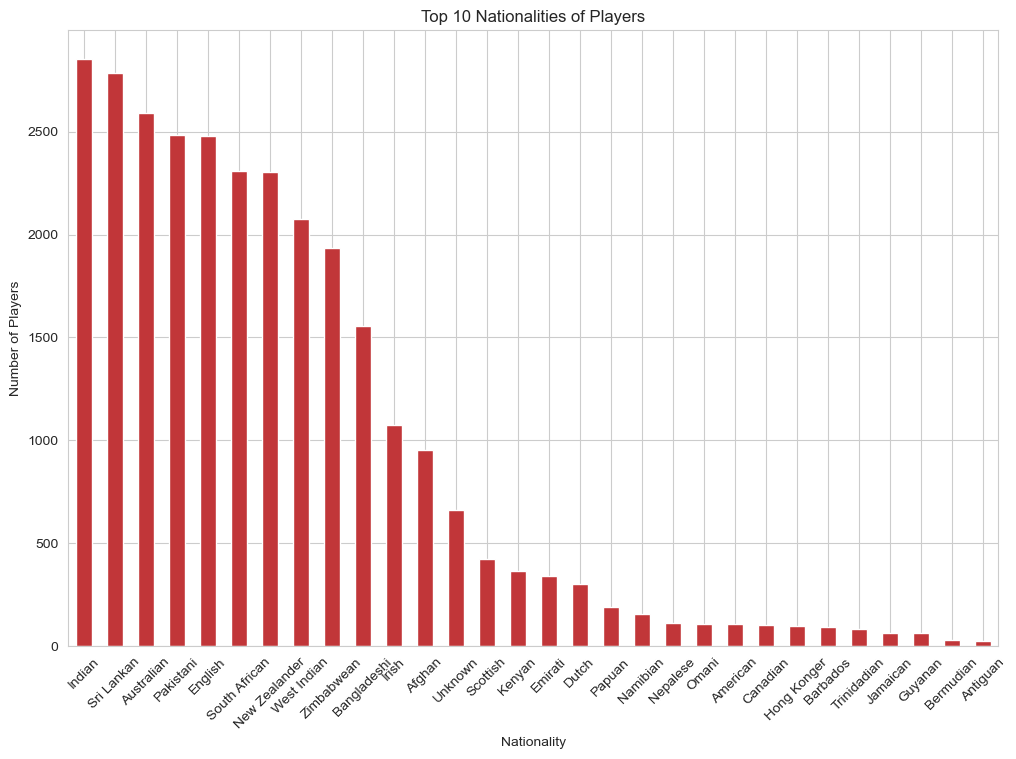

In [282]:

# Getting the top 10 nationalities
top_10_nationalities = players['nationality'].value_counts().head(30)

# Plotting the top 10 nationalities
plt.figure(figsize=(12, 8))
top_10_nationalities.plot(kind='bar')
plt.title('Top 10 Nationalities of Players')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()


### Popular Bowling Styles

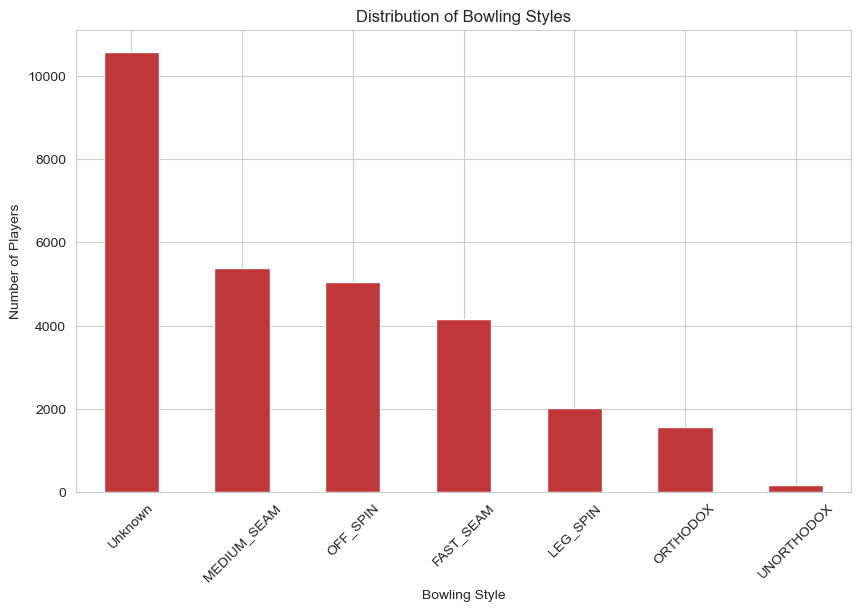

In [285]:
bowling_styles_counts = players['bowlingStyle'].value_counts()

# Plotting the bowling styles
plt.figure(figsize=(10, 6))
bowling_styles_counts.plot(kind='bar')
plt.title('Distribution of Bowling Styles')
plt.xlabel('Bowling Style')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()


### Bowling Preferences (Right-handed vs. Left-handed)

Proportion of Right-Arm Bowlers: 60.84%


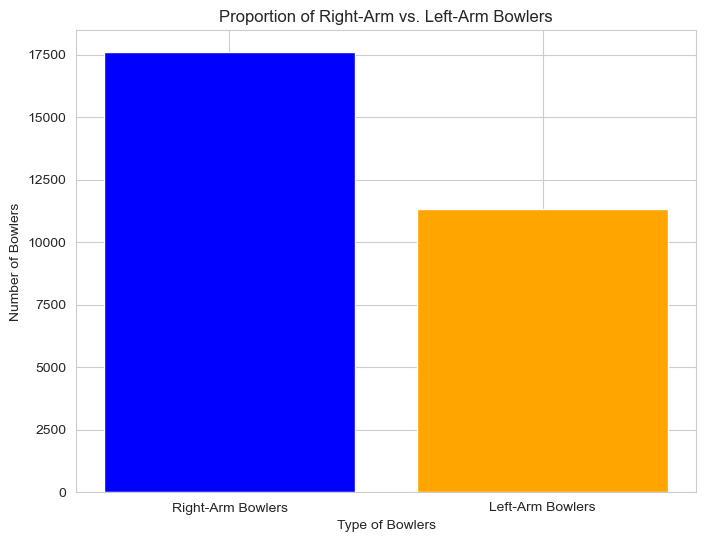

In [291]:
# Proportion of right-arm bowlers
right_arm_bowlers_count = players['rightArmedBowl'].sum()
total_bowlers = players['rightArmedBowl'].count()
proportion_right_arm_bowlers = (right_arm_bowlers_count / total_bowlers) * 100

print(f"Proportion of Right-Arm Bowlers: {proportion_right_arm_bowlers:.2f}%")


left_arm_bowlers_count = total_bowlers - right_arm_bowlers_count

# Data for bar chart
bowler_types = ['Right-Arm Bowlers', 'Left-Arm Bowlers']
bowler_counts = [right_arm_bowlers_count, left_arm_bowlers_count]

# Plotting a bar chart
plt.figure(figsize=(8, 6))
plt.bar(bowler_types, bowler_counts, color=['blue', 'orange'])
plt.title('Proportion of Right-Arm vs. Left-Arm Bowlers')
plt.xlabel('Type of Bowlers')
plt.ylabel('Number of Bowlers')
plt.show()



### Batting Preferences (Right-handed vs. Left-handed)

Proportion of Right-Handed Batsmen: 74.39%


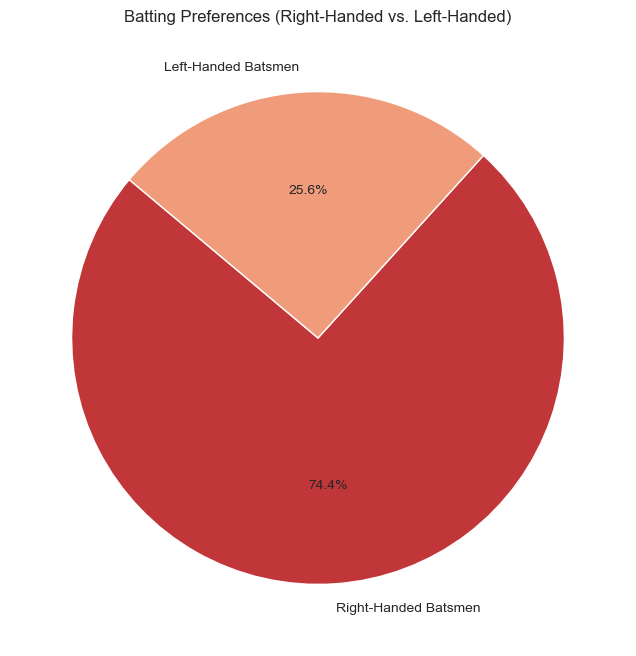

In [290]:
right_handed_batsmen_count = players['rightHandedBat'].sum()
total_batsmen = players['rightHandedBat'].count()
proportion_right_handed_batsmen = (right_handed_batsmen_count / total_batsmen) * 100
print(f"Proportion of Right-Handed Batsmen: {proportion_right_handed_batsmen:.2f}%")
left_handed_batsmen_count = total_batsmen - right_handed_batsmen_count

# Data for pie chart
batting_preferences = [right_handed_batsmen_count, left_handed_batsmen_count]
labels = ['Right-Handed Batsmen', 'Left-Handed Batsmen']

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(batting_preferences, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Batting Preferences (Right-Handed vs. Left-Handed)')
plt.show()


### Relationship between Batting and Bowling Styles

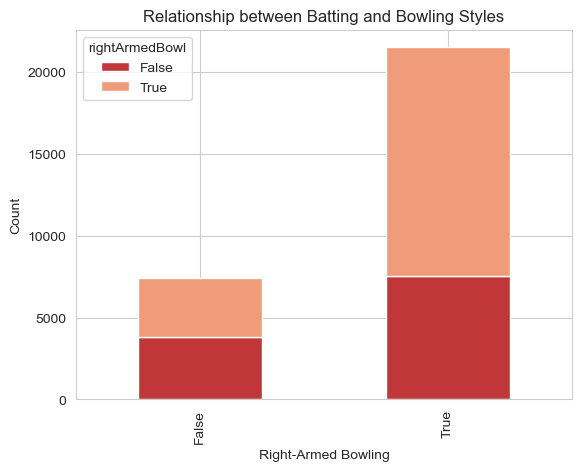

In [267]:

cross_tab = pd.crosstab(players['rightHandedBat'], players['rightArmedBowl'])
cross_tab.plot(kind='bar', stacked=True)
plt.title('Relationship between Batting and Bowling Styles')
plt.xlabel('Right-Armed Bowling')
plt.ylabel('Count')
plt.show()


# overBallDetails

In [141]:
balls=df_list[3]
balls.head(10)

,id,countingBall,nonCountingBall,score,bowlerId,facingBatsmanId,boundary,overHistoryId
0,1,1,1,1,5591.0,1220.0,False,84666
1,2,2,2,.,5591.0,1601.0,False,84666
2,3,3,3,.,5591.0,1601.0,False,84666
3,4,4,4,1Wd,5591.0,1601.0,False,84666
4,5,4,5,.,5591.0,1601.0,False,84666
5,6,5,6,.,5591.0,1601.0,False,84666
6,7,6,7,.,5591.0,1601.0,False,84666
7,8,1,1,.,5590.0,1220.0,False,84667
8,9,2,2,.,5590.0,1220.0,False,84667
9,10,3,3,.,5590.0,1220.0,False,84667


In [142]:
balls.shape

(157323, 8)

In [298]:
balls.dtypes

id                   int64
countingBall         int64
nonCountingBall      int64
score               object
bowlerId           float64
facingBatsmanId    float64
boundary              bool
overHistoryId        int64
dtype: object

In [143]:
balls.isnull().sum()

id                   0
countingBall         0
nonCountingBall      0
score                0
bowlerId           101
facingBatsmanId      3
boundary             0
overHistoryId        0
dtype: int64

In [144]:
balls['id'].duplicated().sum()

0

In [145]:
# Calculate total number of balls bowled by each bowler
bowler_stats = balls.groupby('bowlerId')['countingBall'].count().reset_index()
bowler_stats.columns = ['BowlerID', 'TotalBallsBowled']

# Display the bowler statistics
print("Bowler Statistics:")
print(bowler_stats.head())

Bowler Statistics:
   BowlerID  TotalBallsBowled
0       8.0               122
1       9.0               427
2      86.0                30
3      94.0               522
4     111.0               734


In [293]:
balls.describe()

,id,countingBall,nonCountingBall,bowlerId,facingBatsmanId,overHistoryId
count,157323.000000,157323.000000,157323.000000,157222.000000,157320.000000,157323.000000
mean,78662.000000,3.491250,3.587651,22613.118635,21503.434389,97540.009452
std,45415.382537,1.708686,1.785653,36482.686712,36487.190850,7434.830042
min,1.000000,1.000000,1.000000,8.000000,8.000000,84666.000000
25%,39331.500000,2.000000,2.000000,1652.000000,1417.000000,91097.000000
50%,78662.000000,3.000000,4.000000,3746.000000,3006.000000,97546.000000
75%,117992.500000,5.000000,5.000000,19469.000000,18847.000000,103976.000000
max,157323.000000,7.000000,11.000000,103869.000000,104808.000000,110411.000000


In [299]:
balls.describe(include="O")

,score
count,157323
unique,36
top,.
freq,78098


In [300]:
# Fill missing values in 'nationality' and 'dateOfBirth' columns
balls['bowlerId'].fillna('Unknown', inplace=True)
balls['facingBatsmanId'].fillna('Unknown', inplace=True)

# Check for any remaining missing values
print(balls.isnull().sum())


id                 0
countingBall       0
nonCountingBall    0
score              0
bowlerId           0
facingBatsmanId    0
boundary           0
overHistoryId      0
dtype: int64


### Distribution of runs scored per ball

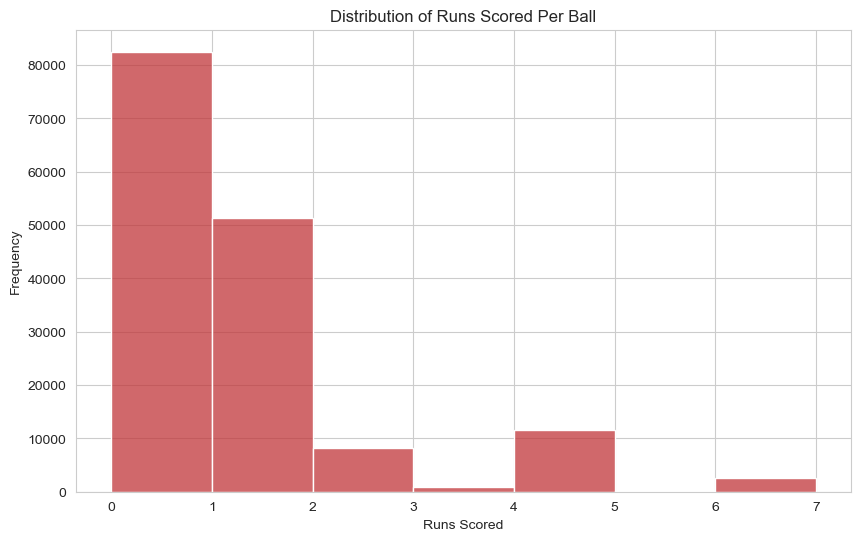

In [307]:
# Preprocessing the score column to extract numerical values for runs scored
balls['runs_scored'] = balls['score'].apply(lambda x: 0 if x == '.' else (int(x[0]) if x[0].isdigit() else 0))

# Visualizing the distribution of runs scored per ball
plt.figure(figsize=(10, 6))
sns.histplot(balls['runs_scored'], bins=range(0, balls['runs_scored'].max() + 1), kde=False)
plt.title('Distribution of Runs Scored Per Ball')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.show()

### Distribution of Boundaries(4s and 6s)

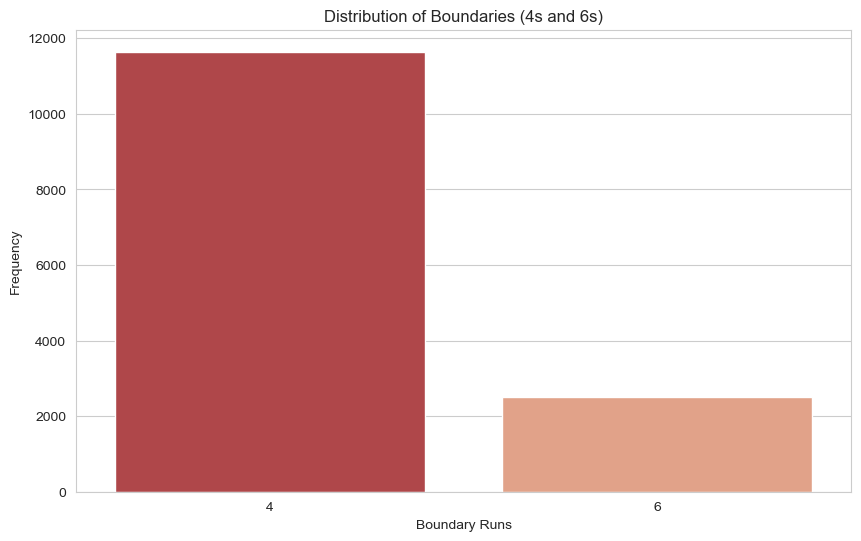

In [308]:
# Analyzing the distribution of boundaries
boundaries = balls[balls['runs_scored'].isin([4, 6])]

plt.figure(figsize=(10, 6))
sns.countplot(x='runs_scored', data=boundaries)
plt.title('Distribution of Boundaries (4s and 6s)')
plt.xlabel('Boundary Runs')
plt.ylabel('Frequency')
plt.show()

# overHistory

In [310]:
history = df_list[4]
history.head()

,ovNo,ovBalls/0,ovBalls/1,ovBalls/2,ovBalls/3,ovBalls/4,ovBalls/5,ovBalls/6,id,inningId,ovBalls/7,ovBalls/8,ovBalls/9,ovBalls/10,ovBalls/11,ovBalls/12,ovBalls/13,bowlerId
0,1,1,.,.,.,1Wd,.,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,.,.,.,1,1,NaN,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,W,1,.,1Nb,.,.,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,1Nb,.,.,.,4,.,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,.,.,4,.,.,.,NaN,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [311]:
history.shape

(110411, 18)

In [312]:
history.dtypes

ovNo            int64
ovBalls/0      object
ovBalls/1      object
ovBalls/2      object
ovBalls/3      object
ovBalls/4      object
ovBalls/5      object
ovBalls/6      object
id              int64
inningId        int64
ovBalls/7      object
ovBalls/8      object
ovBalls/9      object
ovBalls/10     object
ovBalls/11     object
ovBalls/12     object
ovBalls/13     object
bowlerId      float64
dtype: object

In [314]:
history.isnull().sum()

ovNo               0
ovBalls/0          0
ovBalls/1        247
ovBalls/2        505
ovBalls/3        746
ovBalls/4       1006
ovBalls/5       1415
ovBalls/6      95848
id                 0
inningId           0
ovBalls/7     108413
ovBalls/8     110133
ovBalls/9     110366
ovBalls/10    110402
ovBalls/11    110409
ovBalls/12    110410
ovBalls/13    110410
bowlerId       84682
dtype: int64

In [ ]:
#dropping columns because these columns have more then 50% missing values
columns_to_drop=['matchStatus','matchStatus_victoryMarginInningsRuns','umpire.name.5','matchStatus_victoryMarginWickets','matchStatus_victoryMarginRuns','totalBalls']
matches=matches.drop(columns=columns_to_drop)

# innings

In [146]:
innings = df_list[6]
innings.head(5)

,id,matchId,inningsNumber,runRate,overProgress,runs,wkts,ballsFaced,fours,sixes,allOut,noBallRuns,wideRuns,byeRuns,legByeRuns,penaltyRuns,battingTeamId,bowlingTeamId
0,1,3124,1,4.82,50.0,241,9,0,0,0,False,3,6,0,2,0,NaN,NaN
1,2,3124,2,3.95,47.2,187,10,0,0,0,True,0,2,0,2,0,NaN,NaN
2,3,3125,1,6.68,50.0,334,6,0,0,0,False,1,5,1,2,0,NaN,NaN
3,4,3125,2,3.26,40.1,131,9,0,0,0,True,1,6,0,9,0,NaN,NaN
4,5,3126,1,3.98,50.0,199,10,0,0,0,True,6,3,0,5,0,NaN,NaN


In [315]:
innings.shape

(2682, 18)

In [317]:
innings.dtypes

id                 int64
matchId            int64
inningsNumber      int64
runRate          float64
overProgress     float64
runs               int64
wkts               int64
ballsFaced         int64
fours              int64
sixes              int64
allOut              bool
noBallRuns         int64
wideRuns           int64
byeRuns            int64
legByeRuns         int64
penaltyRuns        int64
battingTeamId    float64
bowlingTeamId    float64
dtype: object

In [316]:
innings.isnull().sum()

id                  0
matchId             0
inningsNumber       0
runRate             0
overProgress        0
runs                0
wkts                0
ballsFaced          0
fours               0
sixes               0
allOut              0
noBallRuns          0
wideRuns            0
byeRuns             0
legByeRuns          0
penaltyRuns         0
battingTeamId    2081
bowlingTeamId    2081
dtype: int64

In [319]:
innings.drop(['battingTeamId','bowlingTeamId'],axis=1,inplace=True)

In [321]:
innings.columns

Index(['id', 'matchId', 'inningsNumber', 'runRate', 'overProgress', 'runs',
       'wkts', 'ballsFaced', 'fours', 'sixes', 'allOut', 'noBallRuns',
       'wideRuns', 'byeRuns', 'legByeRuns', 'penaltyRuns'],
      dtype='object')

In [324]:
innings.describe()

,id,matchId,inningsNumber,runRate,overProgress,runs,wkts,ballsFaced,fours,sixes,noBallRuns,wideRuns,byeRuns,legByeRuns,penaltyRuns
count,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.00000
mean,1341.500000,26651.462342,1.494407,5.275459,43.772110,231.857196,7.419090,58.701342,4.330723,0.953766,0.666294,7.340418,0.911633,3.388516,0.02610
std,774.371035,38412.373645,0.500062,1.174865,8.996007,70.897934,2.740889,112.282896,8.785216,2.434082,1.089493,4.462542,1.690977,2.794141,0.36037
min,1.000000,543.000000,1.000000,2.370000,0.400000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,671.250000,3166.000000,1.000000,4.442500,41.000000,186.000000,6.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,0.00000
50%,1341.500000,6896.000000,1.000000,5.210000,48.200000,233.500000,8.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,3.000000,0.00000
75%,2011.750000,31750.000000,2.000000,6.000000,50.000000,282.000000,10.000000,0.000000,0.000000,0.000000,1.000000,10.000000,1.000000,5.000000,0.00000
max,2682.000000,102980.000000,2.000000,14.160000,50.000000,498.000000,11.000000,300.000000,48.000000,26.000000,13.000000,37.000000,13.000000,16.000000,5.00000


###  Run Distribution

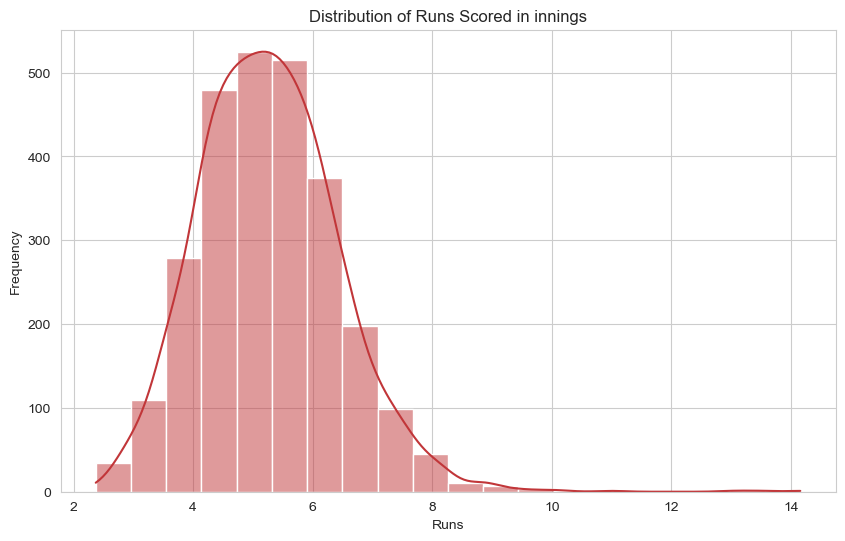

In [325]:
runs = innings['runRate']
#histogram 
plt.figure(figsize=(10,6))
sns.histplot(runs,bins=20,kde=True)
plt.title('Distribution of Runs Scored in innings')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

### Wickets Distribution

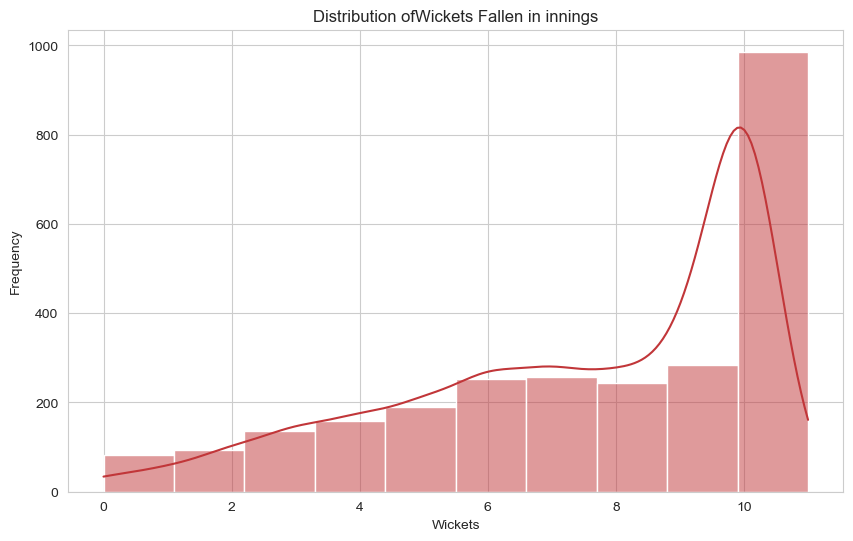

In [326]:
wickets=innings['wkts']
plt.figure(figsize=(10,6))
sns.histplot(wickets,bins=10,kde=True)
plt.title('Distribution ofWickets Fallen in innings')
plt.xlabel('Wickets')
plt.ylabel('Frequency')
plt.show()

### Run Rate

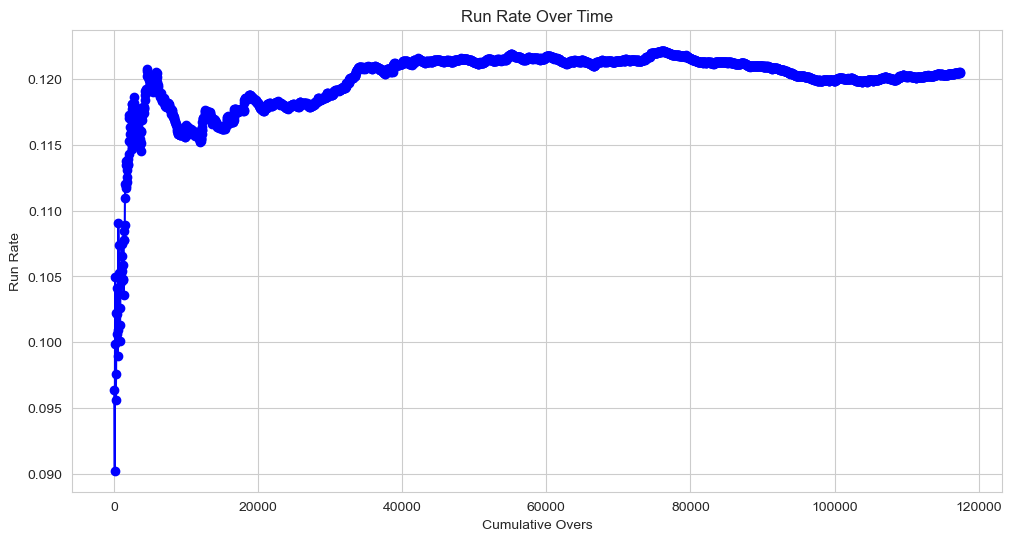

In [329]:
innings['cumulative_runs']=innings['runRate'].cumsum()
innings['cumulative_overs']=innings['overProgress'].cumsum()
innings['run_rate'] = innings['cumulative_runs'] /innings['cumulative_overs']

# Plot the run rate over time
plt.figure(figsize=(12, 6))
plt.plot(innings['cumulative_overs'], innings['run_rate'], marker='o', linestyle='-', color='b')
plt.title('Run Rate Over Time')
plt.xlabel('Cumulative Overs')
plt.ylabel('Run Rate')
plt.grid(True)
plt.show()

### Frequency of Fours and Sixes in Innings

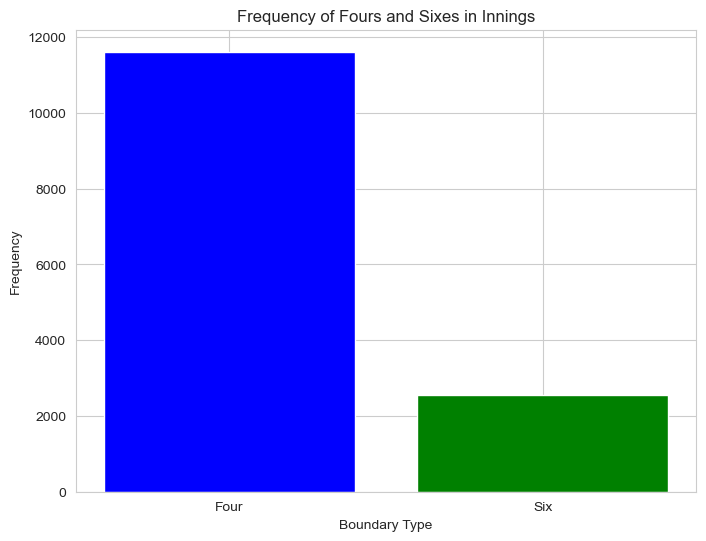

In [333]:
four_freq=innings['fours'].sum()
six_freq=innings['sixes'].sum()
frequencies=[four_freq,six_freq]
labels=['Four','Six']

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, frequencies, color=['blue', 'green'])
plt.title('Frequency of Fours and Sixes in Innings')
plt.xlabel('Boundary Type')
plt.ylabel('Frequency')
plt.show()


In [335]:
# Create a pie chart to visualize the proportion
#plt.figure(figsize=(8, 8))
#plt.pie(frequencies, labels=labels, autopct='%1.1f%%', colors=['yellow', 'green'])
#plt.title('Proportion of Runs Scored through Boundaries')
#plt.show()

### frequency of teams getting all out

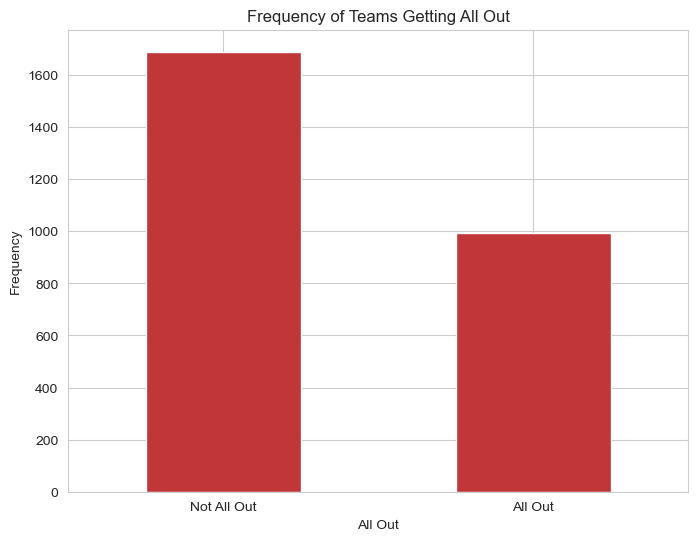

In [337]:
# Calculate the frequency of teams getting all out
all_out_frequency = innings.groupby(['matchId', 'inningsNumber'])['allOut'].max().reset_index()
all_out_frequency['allOut'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.title('Frequency of Teams Getting All Out')
plt.xlabel('All Out')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Not All Out', 'All Out'], rotation=0)
plt.show()

In [338]:
# Calculate average total score and win percentage with and without penalty runs
average_score_with_penalty = innings[innings['penaltyRuns'] > 0]['runs'].mean()
average_score_without_penalty = innings[innings['penaltyRuns'] == 0]['runs'].mean()
win_percentage_with_penalty = innings[innings['penaltyRuns'] > 0]['allOut'].value_counts(normalize=True).get('win', 0)
win_percentage_without_penalty = innings[innings['penaltyRuns'] == 0]['allOut'].value_counts(normalize=True).get('win', 0)

# Compare the statistics
print(f'Average Total Score (With Penalty Runs): {average_score_with_penalty:.2f}')
print(f'Average Total Score (Without Penalty Runs): {average_score_without_penalty:.2f}')
print(f'Win Percentage (With Penalty Runs): {win_percentage_with_penalty * 100:.2f}%')
print(f'Win Percentage (Without Penalty Runs): {win_percentage_without_penalty * 100:.2f}%')


Average Total Score (With Penalty Runs): 222.14
Average Total Score (Without Penalty Runs): 231.91
Win Percentage (With Penalty Runs): 0.00%
Win Percentage (Without Penalty Runs): 0.00%


### average runs and wickets by inning number

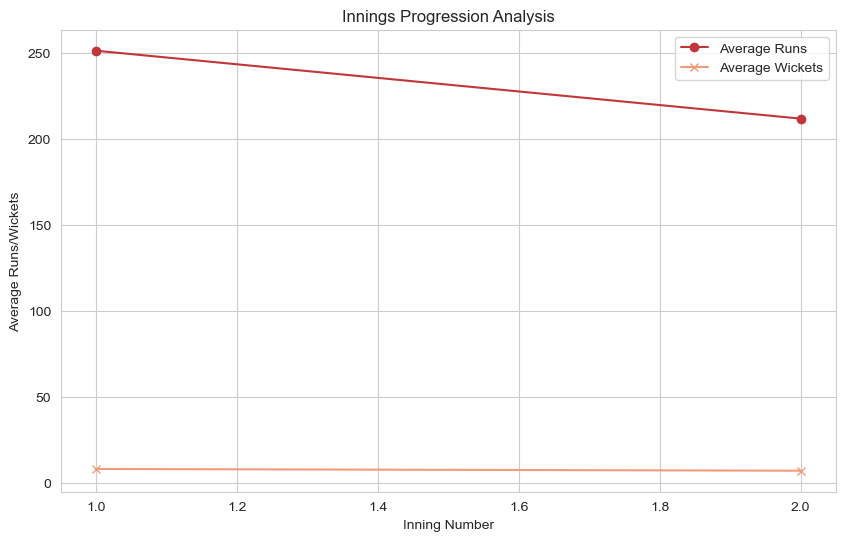

In [340]:
# Assuming your dataset is stored in a DataFrame named 'cricket_data'
# Assuming you have a column 'inningsNumber' indicating the inning number

# Calculate average runs and wickets by inning number
inning_stats = innings.groupby('inningsNumber')[['runs', 'wkts']].mean()

# Create line plots to visualize runs and wickets by inning number
plt.figure(figsize=(10, 6))
plt.plot(inning_stats.index, inning_stats['runs'], marker='o', label='Average Runs')
plt.plot(inning_stats.index, inning_stats['wkts'], marker='x', label='Average Wickets')
plt.title('Innings Progression Analysis')
plt.xlabel('Inning Number')
plt.ylabel('Average Runs/Wickets')
plt.legend()
plt.grid(True)
plt.show()


### Correlation Heatmap

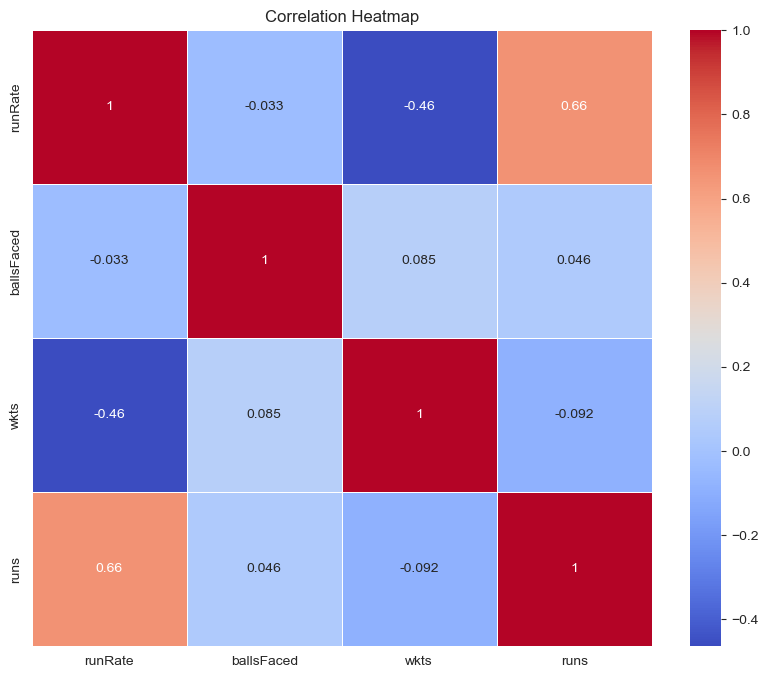

In [339]:

# Select the columns you want to include in the correlation analysis
selected_columns = ['runRate', 'ballsFaced', 'wkts', 'runs']

# Calculate the correlation matrix
correlation_matrix = innings[selected_columns].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# matches

In [147]:
matches = df_list[5]
matches.head()

,id,venueId,toss.elected,toss.winner,team1Id,team2Id,matchDate,matchEndDate,matchDateMs,matchEndDateMs,...,description,matchSummary,matchType,tournamentLabel,oversLimit,totalBalls,isLimitedOvers,match.summary,matchStatus,umpire.name.5
0,2859,73,"Australia, who chose to bat",Australia,2808,2809,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.710000e+11,1.710000e+11,...,Match 1,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN,NaN
1,2860,40,"New Zealand, who chose to bat",New Zealand,2810,2811,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.710000e+11,1.710000e+11,...,Match 2,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN,NaN
2,2861,71,"England, who chose to bat",England,2812,2813,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.710000e+11,1.710000e+11,...,Match 3,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN,NaN
3,2862,39,"West Indies, who chose to field",West Indies,2814,2815,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.710000e+11,1.710000e+11,...,Match 4,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN,NaN
4,2863,82,"Sri Lanka, who chose to field",Sri Lanka,2816,2817,1975-06-11T11:00:00+0000,1975-06-11T23:00:00+0000,1.720000e+11,1.720000e+11,...,Match 5,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN,NaN


In [148]:
matches.shape

(1700, 25)

In [149]:
matches.columns

Index(['id', 'venueId', 'toss.elected', 'toss.winner', 'team1Id', 'team2Id',
       'matchDate', 'matchEndDate', 'matchDateMs', 'matchEndDateMs',
       'matchStatus_outcome', 'matchStatus_text',
       'matchStatus_victoryMarginRuns', 'matchStatus_victoryMarginWickets',
       'matchStatus_victoryMarginInningsRuns', 'description', 'matchSummary',
       'matchType', 'tournamentLabel', 'oversLimit', 'totalBalls',
       'isLimitedOvers', 'match.summary', 'matchStatus', 'umpire.name.5'],
      dtype='object')

In [150]:
matches.dtypes
#df_matches.info()

id                                        int64
venueId                                   int64
toss.elected                             object
toss.winner                              object
team1Id                                   int64
team2Id                                   int64
matchDate                                object
matchEndDate                             object
matchDateMs                             float64
matchEndDateMs                          float64
matchStatus_outcome                      object
matchStatus_text                         object
matchStatus_victoryMarginRuns           float64
matchStatus_victoryMarginWickets        float64
matchStatus_victoryMarginInningsRuns    float64
description                              object
matchSummary                             object
matchType                                object
tournamentLabel                          object
oversLimit                                int64
totalBalls                              

## Statiscal Analysis

In [151]:
matches.describe(include="O")

,toss.elected,toss.winner,matchDate,matchEndDate,matchStatus_outcome,matchStatus_text,description,matchSummary,matchType,tournamentLabel,match.summary,umpire.name.5
count,1600,1600,1700,1674,1689,1692,1700,901,1700,1700,878,2
unique,116,34,1538,1494,4,1012,350,684,1,309,661,2
top,"Australia, who chose to bat",Sri Lanka,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,A,Match cancelled without a ball bowled,1st ODI,Match cancelled without a ball bowled,ODI,ICC World Cup 2002/03,Match cancelled without a ball bowled,Bongani Jele
freq,80,144,4,4,897,30,196,30,1700,54,32,1


In [152]:
matches.describe()

,id,venueId,team1Id,team2Id,matchDateMs,matchEndDateMs,matchStatus_victoryMarginRuns,matchStatus_victoryMarginWickets,matchStatus_victoryMarginInningsRuns,oversLimit,totalBalls,matchStatus
count,1700.000000,1700.000000,1.700000e+03,1.700000e+03,1.675000e+03,1.358000e+03,146.000000,143.000000,0.0,1700.000000,317.0,0.0
mean,22892.415882,4913.961765,1.367768e+07,1.541787e+07,1.391669e+12,1.327256e+12,75.726027,5.391608,NaN,50.258235,300.0,NaN
std,35844.446203,21293.214389,1.369351e+08,1.453228e+08,3.211146e+11,3.242748e+11,62.647841,2.316612,NaN,2.187992,0.0,NaN
min,543.000000,1.000000,0.000000e+00,0.000000e+00,1.710000e+11,1.710000e+11,1.000000,1.000000,NaN,21.000000,300.0,NaN
25%,2970.750000,45.750000,1.569250e+03,1.569750e+03,1.370000e+12,1.300000e+12,26.000000,4.000000,NaN,50.000000,300.0,NaN
50%,4328.500000,84.000000,3.271000e+03,3.272000e+03,1.490000e+12,1.440000e+12,62.500000,5.000000,NaN,50.000000,300.0,NaN
75%,21565.250000,128.000000,8.300000e+03,8.301000e+03,1.580000e+12,1.530000e+12,111.000000,7.000000,NaN,50.000000,300.0,NaN
max,102980.000000,100236.000000,2.147212e+09,2.089043e+09,1.690000e+12,1.630000e+12,317.000000,10.000000,NaN,60.000000,300.0,NaN


# Handling Missing Values

In [153]:
matches.isnull().sum()

id                                         0
venueId                                    0
toss.elected                             100
toss.winner                              100
team1Id                                    0
team2Id                                    0
matchDate                                  0
matchEndDate                              26
matchDateMs                               25
matchEndDateMs                           342
matchStatus_outcome                       11
matchStatus_text                           8
matchStatus_victoryMarginRuns           1554
matchStatus_victoryMarginWickets        1557
matchStatus_victoryMarginInningsRuns    1700
description                                0
matchSummary                             799
matchType                                  0
tournamentLabel                            0
oversLimit                                 0
totalBalls                              1383
isLimitedOvers                             0
match.summ

In [154]:
#dropping columns because these columns have more then 50% missing values
columns_to_drop=['matchStatus','matchStatus_victoryMarginInningsRuns','umpire.name.5','matchStatus_victoryMarginWickets','matchStatus_victoryMarginRuns','totalBalls']
matches=matches.drop(columns=columns_to_drop)

In [155]:
matches.shape

(1700, 19)

In [156]:
#filling missed values with mode as these are categorical values
toss_elected_mode=matches['toss.elected'].mode()[0]
matches['toss.elected']=matches['toss.elected'].fillna(toss_elected_mode)

toss_winner_mode=matches['toss.winner'].mode()[0]
matches['toss.winner']=matches['toss.winner'].fillna(toss_winner_mode)

#filling missing vals with column vals
matches['matchEndDate'] = matches['matchEndDate'].fillna(matches['matchDate'])

# Imputing 'match.summary' and 'matchSummary' with a placeholder
matches['matchSummary'] = matches['matchSummary'].fillna('Not Available')
matches['match.summary'] = matches['match.summary'].fillna('Not Available')

match_status_outcome_mode = matches['matchStatus_outcome'].mode()[0]
matches['matchStatus_outcome'] = matches['matchStatus_outcome'].fillna(match_status_outcome_mode)

match_status_text_mode = matches['matchStatus_text'].mode()[0]
matches['matchStatus_text'] = matches['matchStatus_text'].fillna(match_status_text_mode)


In [157]:
matches.isnull().sum()

id                       0
venueId                  0
toss.elected             0
toss.winner              0
team1Id                  0
team2Id                  0
matchDate                0
matchEndDate             0
matchDateMs             25
matchEndDateMs         342
matchStatus_outcome      0
matchStatus_text         0
description              0
matchSummary             0
matchType                0
tournamentLabel          0
oversLimit               0
isLimitedOvers           0
match.summary            0
dtype: int64

# Visualization

## Team with Most Toss Wins

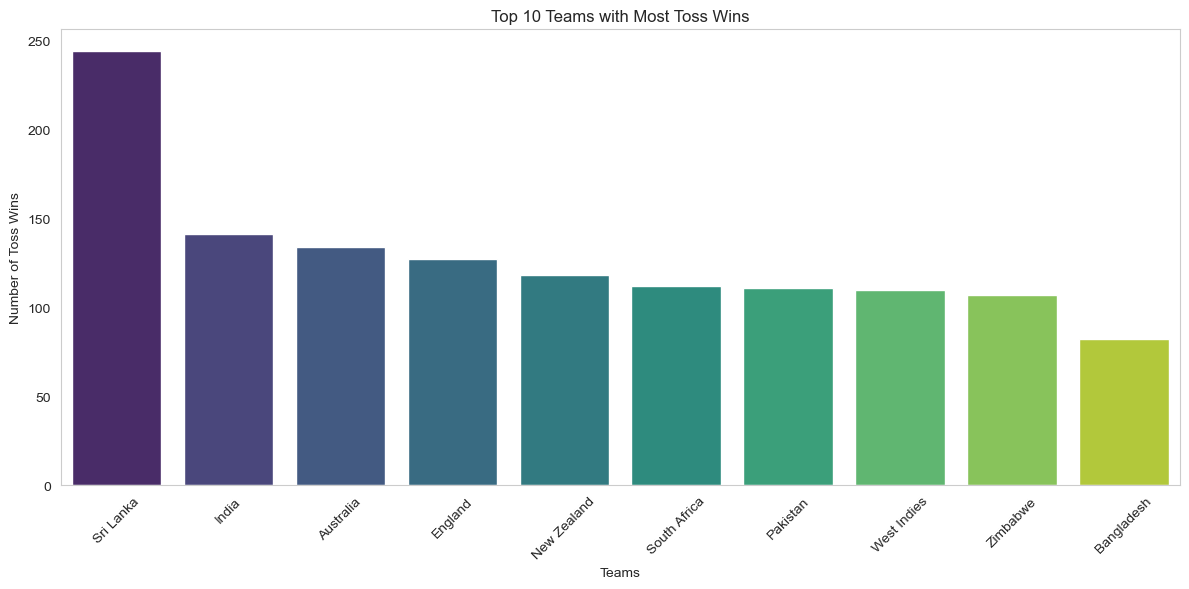

In [165]:
# Analysis: Team with the most toss wins
toss_wins = matches['toss.winner'].value_counts()
toss_wins_top10 = toss_wins.head(10)

# Visualization: Bar chart of top 10 teams with most toss wins
plt.figure(figsize=(12, 6))
sns.barplot(x=toss_wins_top10.index, y=toss_wins_top10.values, palette="viridis")
plt.title("Top 10 Teams with Most Toss Wins")
plt.xlabel("Teams")
plt.ylabel("Number of Toss Wins")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


## What was the most common decision by winning team? 

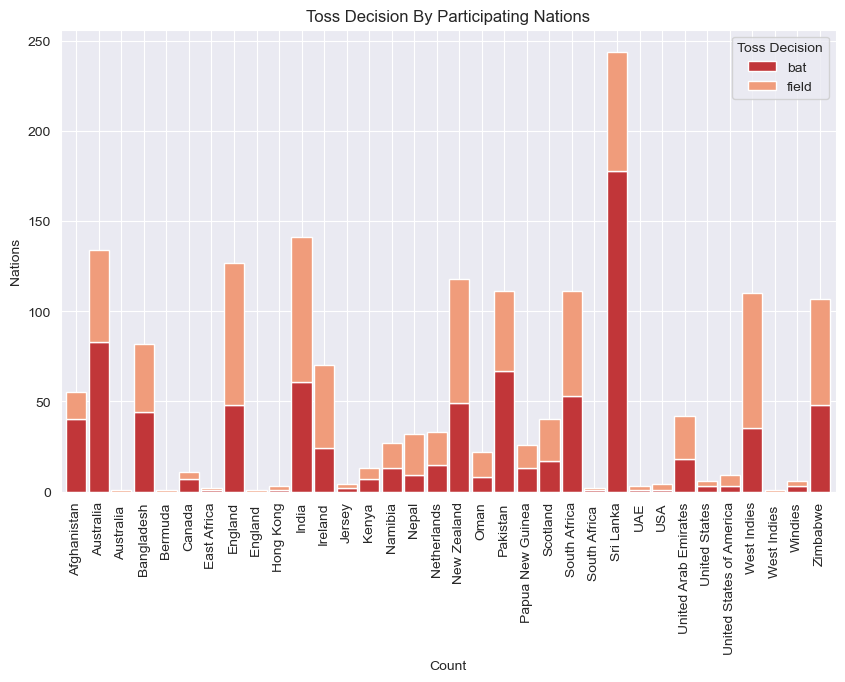

In [170]:
import re
pattern =r'to (.*)'
matches['Toss Decision'] = matches['toss.elected'].str.extract(pattern)
rename_dictionary = {'Bat': 'bat', 'Field': 'field', 'bowl': 'field','Bat':'bat',' bat':'bat'}
matches=matches[matches['Toss Decision'].isin(['bat',' bat','Bat','field','Field','bowl'])].replace(rename_dictionary)
toss=pd.DataFrame(matches[['toss.winner','Toss Decision']].groupby('toss.winner').value_counts().unstack())
sns.set_style('darkgrid')
sns.set_palette('RdBu')
ax = toss.plot(kind='bar', stacked=True, figsize=(10, 6),width=0.9)
ax.set_xlabel('Count')
ax.set_ylabel('Nations')
ax.set_title('Toss Decision By Participating Nations')
plt.show()

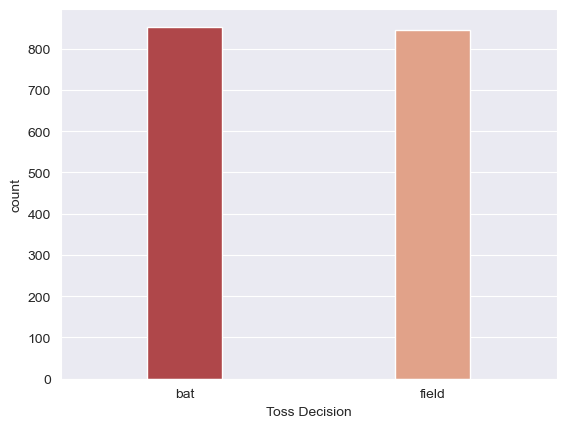

In [171]:
sns.countplot(data=matches,x='Toss Decision',width=0.3)
plt.show()